# Microarray validation- GABA

In [1]:
import NotebookImport
from DX_screen import *

importing IPython notebook from DX_screen

importing IPython notebook from Imports

importing IPython notebook from /cellar/users/agross/anaconda2/lib/python2.7/site-packages/MethylTools/Probe_Annotations

In [2]:
store = pd.HDFStore('/data_ssd/GEO_microarray_dx.h5')
microarray = store['data']
tissue = store['tissue']

In [3]:
PATH =  '/cellar/users/agross/Data/DiffExp/Data/'
f = PATH + 'GSE53757_series_matrix.txt'
meta = pd.read_table(f, skiprows=29, nrows=30, index_col=0)
df = pd.read_table(f, skiprows=63, index_col=0, names=meta.columns)
cols = [(c[:-1], '11' if c.endswith('N') else '01') 
        for c in df.columns]
df.columns = pd.MultiIndex.from_tuples(cols)
df = df.dropna()

In [4]:
f = PATH + 'GPL570-13270.txt'
mapping = pd.read_table(f, skiprows=16, index_col='ID', usecols=['ID','Gene Symbol'],
                        squeeze=True).dropna()

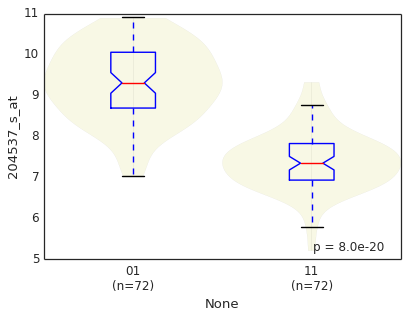

In [5]:
violin_plot_series(np.log2(df.ix[ti(mapping=='GABRE')].iloc[0]))

In [6]:
tissue.value_counts()

LIHC        1146
PRAD         424
COADREAD     367
PANCAN       341
COAD         334
KIRC         144
BRCA         108
NSCLC         40
dtype: int64

In [7]:
gabr = ['GABRA1',
 'GABRA2',
 'GABRA3',
 'GABRA4',
 'GABRA5',
 'GABRA6',
 'GABRB1',
 'GABRB2',
 'GABRB3',
 'GABRD',
 'GABRE',
 'GABRG1',
 'GABRG2',
 'GABRG3',
 'GABRP',
 'GABRQ',
 'GABRR1',
 'GABRR2',
 'GABRR3']

In [8]:
dx = microarray.xs('01',1,1) - microarray.xs('11',1,1)
tt = tissue[:,'01'].replace('COAD','COADREAD')
genes = ti(dx.notnull().sum(1) > 500)
dx = dx.ix[genes]

In [9]:
kk = microarray.ix[gabr, ti(tissue == 'KIRC')]
kk = np.log2(kk)

In [10]:
f = binomial_test_screen(kk, 1.)

In [11]:
f.sort('frac')

,num_ox,num_dx,frac,p
GABRA2,3,72,0.04,2.64e-17
GABRB2,6,72,0.08,7.26e-14
GABRA4,10,72,0.14,2.69e-10
GABRB3,12,72,0.17,8.06e-09
GABRP,14,72,0.19,1.65e-07
GABRB1,24,72,0.33,6.31e-03
GABRA6,26,72,0.36,2.45e-02
GABRG1,26,72,0.36,2.45e-02
GABRG3,26,72,0.36,2.45e-02
GABRA5,28,72,0.39,7.64e-02


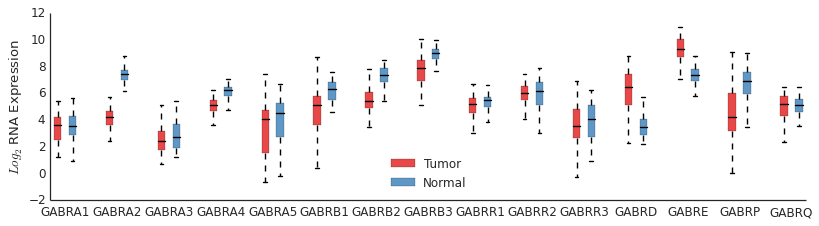

In [12]:
o = ['GABRA1','GABRA2', 'GABRA3', 'GABRA4', 'GABRA5',
     'GABRB1', 'GABRB2', 'GABRB3',
     'GABRR1', 'GABRR2', 'GABRR3',
     'GABRD','GABRE','GABRP','GABRQ']
paired_boxplot_tumor_normal(kk.T, order=o, sig=False)
prettify_ax(plt.gca())

In [13]:
vv = microarray.ix['GABRD'].unstack()[['01','11']].dropna().stack()
cc = tissue.groupby(level=0).first()

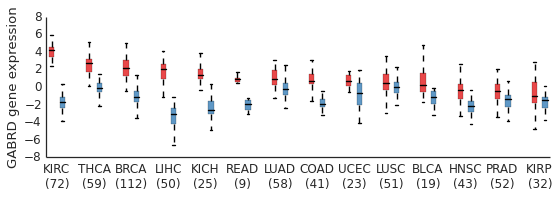

In [14]:
paired_bp_tn_split(matched_rna.ix['GABRD'], codes)

In [15]:
cc.name = 'codes'

In [16]:
vv.name = 'v'

In [17]:
vv.unstack().groupby(cc).size()

codes
BRCA         45
COAD        142
COADREAD     46
KIRC         72
LIHC        528
PANCAN       71
PRAD        160
dtype: int64

In [18]:
g = ['PCNA', 'CKS2', 'NUSAP1', 'RRM2', 'ZWINT', 
     'PRC1', 'TFDP1', 'CCNA2', 'CCNB1', 'MELK', 
     'TPX2', 'BIRC5', 'NCAPG2', 'RFWD3', 'TACC3', 
     'KIAA0101', 'MCM2', 'MCM5', 'ASF1B', 'CCNB2', 
     'GTPBP2', 'KIF20A', 'PTTG1', 'AURKA', 'CDC20', 
     'FOXM1', 'GINS2', 'MAD2L1', 'UBE2C', 'GINS1', 
     'MCM6', 'NCAPD2', 'NUP37', 'CKS1B', 'MCM7', 
     'ARID3A', 'AURKB', 'CDCA8', 'SNRPD1', 'TROAP', 
     'C21orf45', 'DDX39', 'ESPL1', 'HMBS', 'LSM6', 
     'MCM4', 'NCAPD3', 'PPIH', 'DTL', 'EPB42', 'HMGN2',
     'MCM3', 'PF4', 'PPBP', 'RFC4', 'TOP2A', 'BUB1B', 
     'CDT1', 'FEN1', 'GATA1', 'GYPB', 'HMGB2', 'KIF22', 
     'KLF1', 'MLF1IP', 'RFC3', 'RHCE', 'TAL1', 'TCF3', 
     'ALAS2', 'CDCA3', 'CENPA', 'CKLF', 'GTSE1', 
     'NFE2', 'OIP5', 'SHCBP1', 'SNF8', 'SNRPB', 'SPTA1', 
     'KEL', 'KIF2C', 'LYL1', 'PSMD9', 'RACGAP1', 'RPIA',
     'TIMELESS', 'TRMT5', 'TYMS', 'VRK1', 'FBXO7', 'H3F3A',
     'NUDT1', 'PLEK', 'POLE2', 'RHAG', 'WHSC1', 'APOBEC3B', 
     'BPGM', 'CHAF1A', 'DNAJC9', 'FBXO5', 'KIF4A', 'KLF15', 
     'MKI67', 'PGD', 'RPA3', 'SFRS2', 'TRIM58', 'ADAMTS13', 
     'CDCA4', 'CDKN3', 'FECH', 'LBR', 'LIG1', 'LMNB1', 'MICB', 
     'NUP210', 'ORC6L', 'RAD51AP1', 'RHD', 'SMC4', 'GYPA', 
     'RPP30', 'TRIM10']
meta_pcna_all = np.log2(microarray.ix[g, ti(tissue == 'KIRC')]).median()
meta_pcna_all = meta_pcna_all.unstack()[['01','11']].dropna().stack()
meta_pcna_all.name = 'meta_pcna'
len(meta_pcna_all)

144

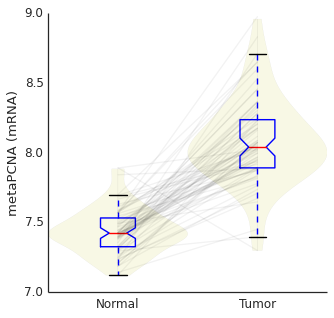

In [19]:
#Do not import
mm = meta_pcna_all
fig, ax = subplots(figsize=(5,5))
violin_plot_series(mm, ax=ax, order=['11','01'], ann=None)

for i,v in mm.unstack().iterrows():
    ax.plot([0,1],[v['11'], v['01']], color='black', alpha=.05)
ax.set_ylabel('metaPCNA (mRNA)')
ax.set_xlabel('')
ax.set_xticklabels(['Normal','Tumor'])
prettify_ax(ax)
#fig.savefig(FIGDIR + 'tn_tumorness.png', dpi=300)

In [20]:
m2 = meta_pcna_all
(m2.unstack().T.diff().ix[1] < 0).value_counts()

True     71
False     1
dtype: int64

In [21]:
dp = meta_pcna_all[:,'01'] - meta_pcna_all[:,'11']
dx = kk.ix['GABRD'][:,'01'] - kk.ix['GABRD'][:,'11']

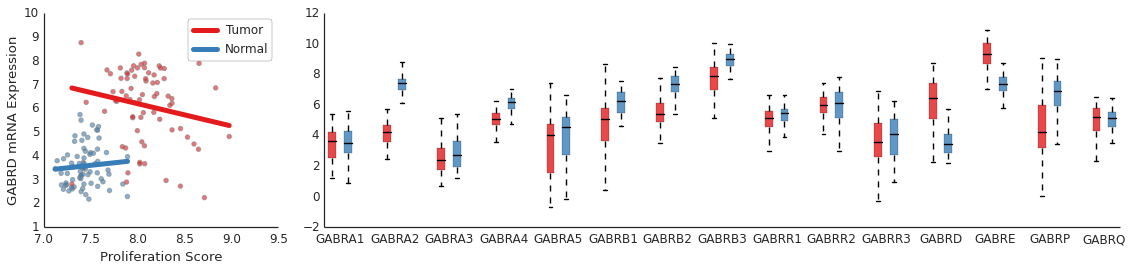

In [33]:
plt.rcParams['font.size'] = 15
fig = plt.figure(figsize=(16, 4))
ax1 = plt.subplot2grid((1, 8), (0, 0), colspan=2)
ax2 = plt.subplot2grid((1, 8), (0, 2), colspan=6)

ax = ax1

vv = kk.ix['GABRD']
cc = pd.Series(vv.index.get_level_values(1), 
               vv.index).map({'01': colors[0], '11': colors[1]})
series_scatter(meta_pcna_all, vv, zorder=1,
               ax=ax, ann=None, s=20, edgecolor='grey', linewidths=1,
               alpha=.6, color=cc)

line_args = {'lw':5, 'solid_capstyle':'round'}
l1, l2 = process_line_args(line_args)
x,y = meta_pcna_all[:,'01'], vv[:,'01']
reg = linear_regression(x,y)
line_me(reg['slope'], reg['intercept'], start=x.min(), end=x.max(),
            ax=ax, color=colors[0], **l1)

x,y = meta_pcna_all[:,'11'], vv[:,'11']
reg = linear_regression(x,y)
line_me(reg['slope'], reg['intercept'], start=x.min(), end=x.max(),
            ax=ax, color=colors[1], **l1)

ax1.legend(['Tumor','Normal'], loc='upper right', scatterpoints=1, markerscale=1.5,
          fancybox=True, frameon=True)
ax1.set_xlabel('Proliferation Score')
ax1.set_ylabel('GABRD mRNA Expression')

prettify_ax(ax1)
o = ['GABRA1','GABRA2', 'GABRA3', 'GABRA4', 'GABRA5',
     'GABRB1', 'GABRB2', 'GABRB3',
     'GABRR1', 'GABRR2', 'GABRR3',
     'GABRD','GABRE','GABRP','GABRQ']
paired_boxplot_tumor_normal(kk.T, order=o, sig=False, ax=ax2)
ax2.legend_.set_visible(False)
ax2.set_ylabel('')
prettify_ax(ax2)
fig.tight_layout()
fig.savefig('/cellar/users/agross/Desktop/Figures/GABA_microarray.pdf')